In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All good data analysis projects start with trying to answer questions. Following are the questions we can answer using this data.

1. Who were the passengers on the titanic (age, gender, class..etc)
2. What deck were the passengers on and how does it relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Deeper:  
**What factors helped someone survive the sinking?**

## First Question: Who were the passengers on titanic?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Sex', ylabel='count'>

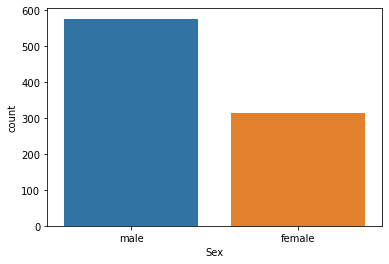

In [5]:
sns.countplot(x = 'Sex', data = titanic_df)

Number of male passngers seems to be almost double the number of female passengers. Let's compare classes next.

<AxesSubplot:xlabel='Sex', ylabel='count'>

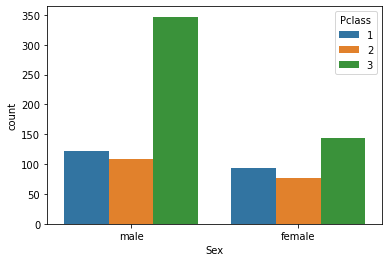

In [6]:
sns.countplot(x = 'Sex', data = titanic_df, hue = 'Pclass')

Most of the men are in class 3. There are more females in class 3 too, so let's observe classes.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

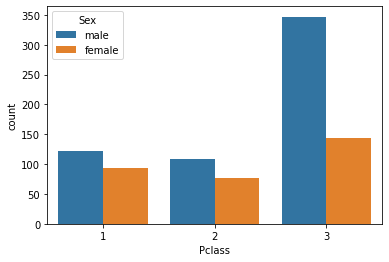

In [7]:
sns.countplot(x = 'Pclass', data = titanic_df, hue = 'Sex')

**We want to make sure to separately define male, female and children, as the survival rate is dependent on that. To define children apply function is used.**

In [8]:
#functio that will define the sex and child
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex

In [9]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


sns.countplot(x = 'Pclass', data = titanic_df, hue = 'person')

In [11]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

**What is the distribution of age of persons?**

<AxesSubplot:>

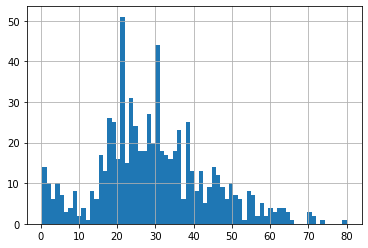

In [12]:
titanic_df['Age'].hist(bins = 70)

In [13]:
titanic_df['Age'].mean()

29.69911764705882

**How else can we visualize this data?**

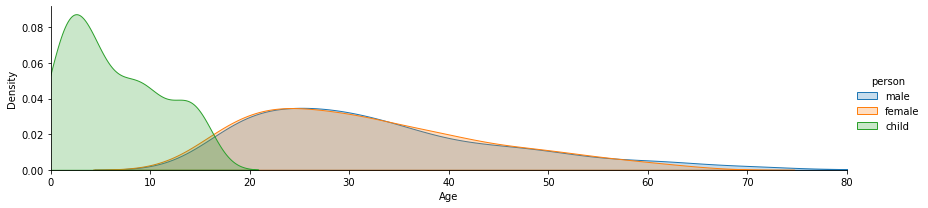

In [14]:
fig = sns.FacetGrid(data = titanic_df, hue = 'person', aspect = 4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0, oldest))

fig.add_legend()

**How ages range by class?**

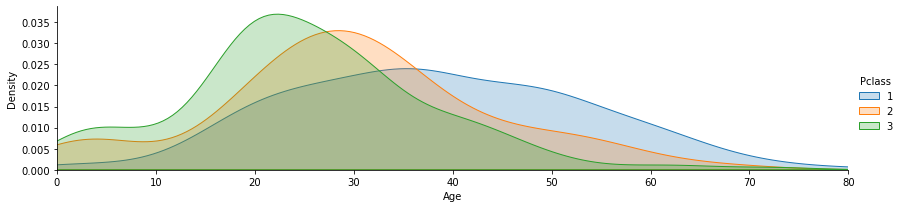

In [15]:
fig = sns.FacetGrid(data = titanic_df, hue = 'Pclass', aspect = 4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0, oldest))

fig.add_legend()

## Second Question: What deck were the passengers on?

In [16]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='count'>

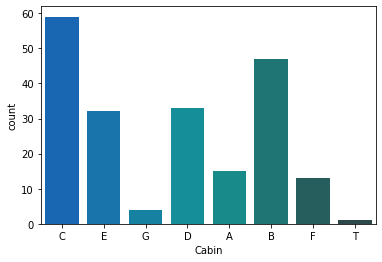

In [17]:
#how to get deck?
levels = []
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels, columns = ['Cabin'])

sns.countplot(x = 'Cabin', data = cabin_df, palette = 'winter_d')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

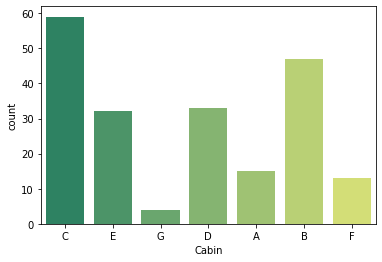

In [18]:
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']
sns.countplot(x = 'Cabin', data = cabin_df, palette = 'summer')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

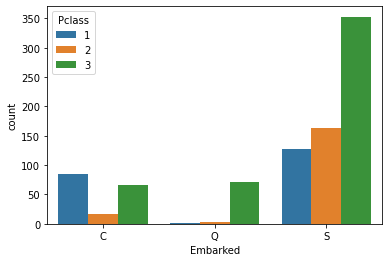

In [19]:
sns.countplot(x = 'Embarked', data = titanic_df, hue = 'Pclass', order = ['C', 'Q', 'S'])

## Who was alone and who was with family?

In [20]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


In [21]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['Alone'] = np.where(titanic_df['Alone']>0, 'Not alone', 'Alone')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Not alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Not alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Not alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,Not alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

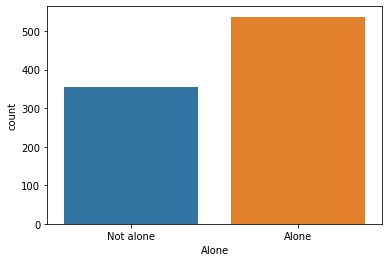

In [22]:
sns.countplot(x = 'Alone', data = titanic_df)

## What factors helped someone survive the titanic? Was class a factor?

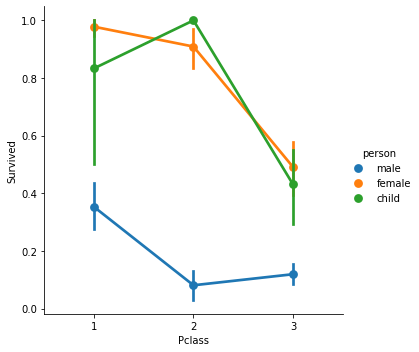

In [23]:
sns.catplot(x='Pclass', y='Survived', hue = 'person', data = titanic_df, kind = 'point')

This shows being male, female or child had lower survival rates in class 3 irrespective of gender.

### Is there a connection with age?

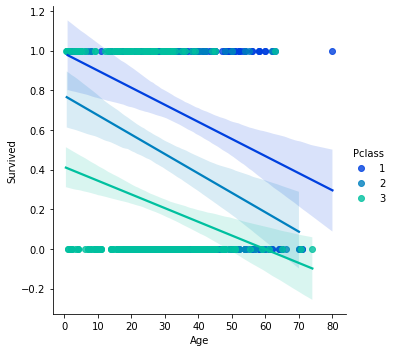

In [24]:
sns.lmplot(x = 'Age', y = 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter')

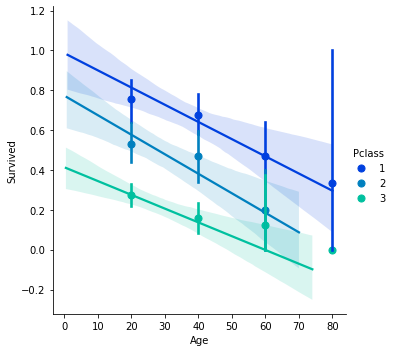

In [25]:
#Bin the above plot
generations = [20, 40, 60 , 80]
sns.lmplot(x = 'Age', y = 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter', x_bins = generations)

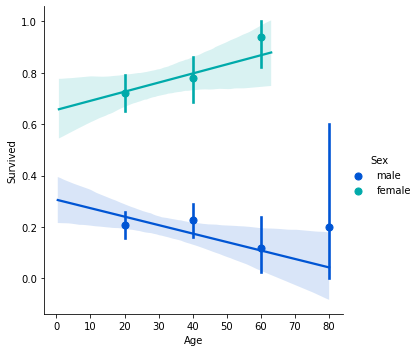

In [26]:
#What about the variations with gender?
#Bin the above plot
generations = [20, 40, 60 , 80]
sns.lmplot(x = 'Age', y = 'Survived', hue = 'Sex', data = titanic_df, palette = 'winter', x_bins = generations)

## Next set of question to answer?

1. Did the deck level have an effect on the survival rate and how did gender come into play there?
2. Did having a family member increase the odds of surviving the crash?

In [27]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Not alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Not alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Not alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,Not alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


In [31]:
cabin_df = pd.DataFrame(titanic_df.dropna(subset = ['Cabin', 'Sex', 'Alone']))
#cabin_df['Deck'] = cabin_df['Cabin'].apply(lambda x: x[0])
cabin_df['Deck'] = cabin_df['Cabin'].str[0]
cabin_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Not alone,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Not alone,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,Not alone,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female,Not alone,D
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male,Alone,B
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female,Not alone,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,B


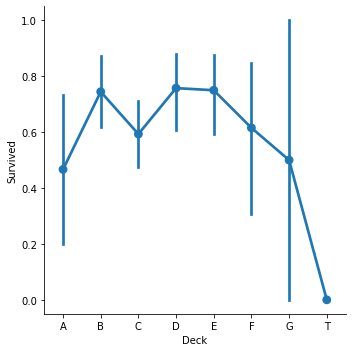

In [32]:
sns.catplot(x='Deck', y = 'Survived', data = cabin_df, kind = 'point', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

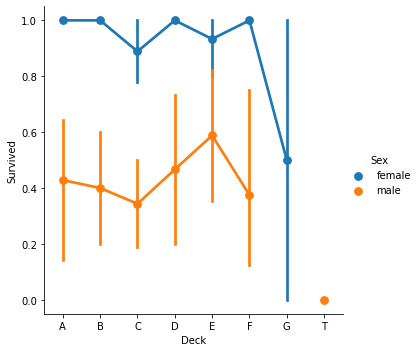

In [33]:
sns.catplot(x='Deck', y = 'Survived', data = cabin_df, hue = 'Sex', kind = 'point', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

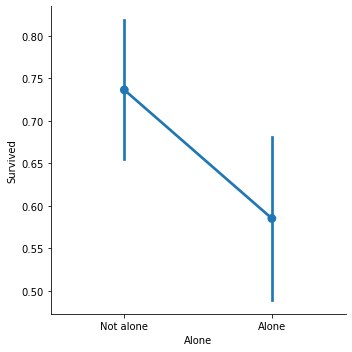

In [34]:
sns.catplot(x='Alone', y = 'Survived', data = cabin_df, kind = 'point')